## 1.Importing the required libraries

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt            
%matplotlib inline     
sns.set(color_codes=True)

## 2. Loading the data

In [2]:
#LOADING DATA
#This data isnt in UTF-8 encoding so I had to set the latin1 encoding
df = pd.read_csv('data.csv', encoding='latin1')

### Checking the data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

## Cleaning process

In [9]:
#Making the dataset easyer for read, by renaming the invoice columns.
df = df.rename(index = str,columns ={'InvoiceNo':'invoNo','InvoiceDate':'invoDate'})

In [10]:
#Droping the StockCode column, because I dont see a use for this for now.
df.drop('StockCode', axis=1, inplace=True)
df.head()

,invoNo,Description,Quantity,invoDate,UnitPrice,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
#Converting the type of ivoDate
df['invoDate'] = pd.to_datetime(df['invoDate'])
df['invoDate'].dtype

dtype('<M8[ns]')

In [12]:
#Creating columns for day, month, year and time using the invoDate column
df['day'] = df['invoDate'].dt.day
df['month'] = df['invoDate'].dt.month
df['year'] = df['invoDate'].dt.year
df['time'] = df['invoDate'].dt.time
df.head()

,invoNo,Description,Quantity,invoDate,UnitPrice,CustomerID,Country,day,month,year,time
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,08:26:00
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,08:26:00
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,08:26:00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,08:26:00
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,08:26:00


In [13]:
#looking for the missing values in each column
df.isna().sum()

invoNo              0
Description      1454
Quantity            0
invoDate            0
UnitPrice           0
CustomerID     135080
Country             0
day                 0
month               0
year                0
time                0
dtype: int64

In [14]:
#Droping the missing values
df = df.dropna()
df.count()

invoNo         406829
Description    406829
Quantity       406829
invoDate       406829
UnitPrice      406829
CustomerID     406829
Country        406829
day            406829
month          406829
year           406829
time           406829
dtype: int64

In [15]:
#Looking for negative numeric data.
df.describe().round(2)

,Quantity,UnitPrice,CustomerID,day,month,year
count,406829.00,406829.00,406829.00,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69,15.04,7.61,2010.93
std,248.69,69.32,1713.60,8.65,3.42,0.25
min,-80995.00,0.00,12346.00,1.00,1.00,2010.00
25%,2.00,1.25,13953.00,7.00,5.00,2011.00
50%,5.00,1.95,15152.00,15.00,8.00,2011.00
75%,12.00,3.75,16791.00,22.00,11.00,2011.00
max,80995.00,38970.00,18287.00,31.00,12.00,2011.00


In [16]:
#Deleting the negative values in 'Quantity' column
df = df[df['Quantity']>=0]
df.describe().round(2)

,Quantity,UnitPrice,CustomerID,day,month,year
count,397924.00,397924.00,397924.00,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32,15.04,7.61,2010.93
std,180.42,22.10,1713.17,8.65,3.42,0.25
min,1.00,0.00,12346.00,1.00,1.00,2010.00
25%,2.00,1.25,13969.00,7.00,5.00,2011.00
50%,6.00,1.95,15159.00,15.00,8.00,2011.00
75%,12.00,3.75,16795.00,22.00,11.00,2011.00
max,80995.00,8142.75,18287.00,31.00,12.00,2011.00


In [17]:
#Creating a column that shows the total spended in each invoce
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']
df.head()

,invoNo,Description,Quantity,invoDate,UnitPrice,CustomerID,Country,day,month,year,time,TotalSpend
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,12,2010,08:26:00,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,08:26:00,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,12,2010,08:26:00,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,08:26:00,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,12,2010,08:26:00,20.34


In [18]:
#Reordering the columns in dataframe
df = df[['CustomerID','Description','Quantity','UnitPrice',
         'TotalSpend','Country','invoNo','invoDate','day','month','year','time']]
df.head()

,CustomerID,Description,Quantity,UnitPrice,TotalSpend,Country,invoNo,invoDate,day,month,year,time
0,17850.0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,United Kingdom,536365,2010-12-01 08:26:00,1,12,2010,08:26:00
1,17850.0,WHITE METAL LANTERN,6,3.39,20.34,United Kingdom,536365,2010-12-01 08:26:00,1,12,2010,08:26:00
2,17850.0,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,United Kingdom,536365,2010-12-01 08:26:00,1,12,2010,08:26:00
3,17850.0,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,United Kingdom,536365,2010-12-01 08:26:00,1,12,2010,08:26:00
4,17850.0,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,United Kingdom,536365,2010-12-01 08:26:00,1,12,2010,08:26:00


## Exploratory Data Analysis (EDA)

#### Detecting Outliers

<AxesSubplot:xlabel='UnitPrice'>

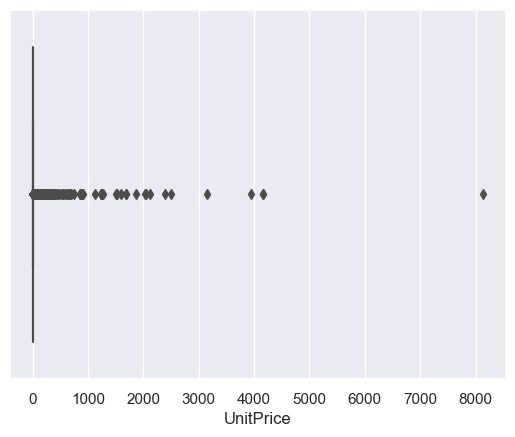

In [19]:
sns.boxplot(x=df['UnitPrice'])

<AxesSubplot:xlabel='TotalSpend'>

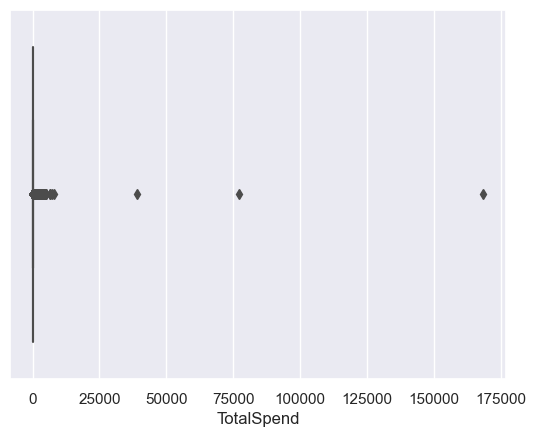

In [20]:
sns.boxplot(x=df['TotalSpend'])

<AxesSubplot:xlabel='Quantity'>

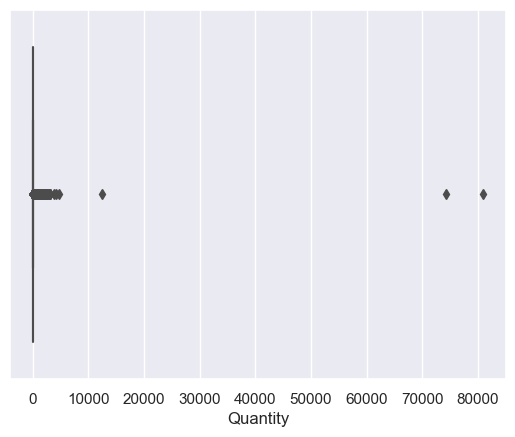

In [21]:
sns.boxplot(x=df['Quantity'])

In [22]:
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = numeric_df[(numeric_df < lower_bound) |(numeric_df > upper_bound)]
outlier_counts = outliers.notna().sum()
print("\nNumber of outliers per column:")
print(outlier_counts)



Number of outliers per column:
CustomerID        0
Quantity      25656
UnitPrice     34356
TotalSpend    31241
day               0
month             0
year          26160
dtype: int64


In [23]:
outlier_counts.sum()

117413

#### Product  Analysis

In [24]:
#show in a dataframe the top 5 most popular products(based on quantity sold). 
sellings = df.groupby('Description')['Quantity'].sum().reset_index()
top_products = sellings.sort_values(by='Quantity',ascending=False)
top_5_products = top_products.head(5).set_index('Description')
top_5_products

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
JUMBO BAG RED RETROSPOT,46181
WHITE HANGING HEART T-LIGHT HOLDER,36725


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

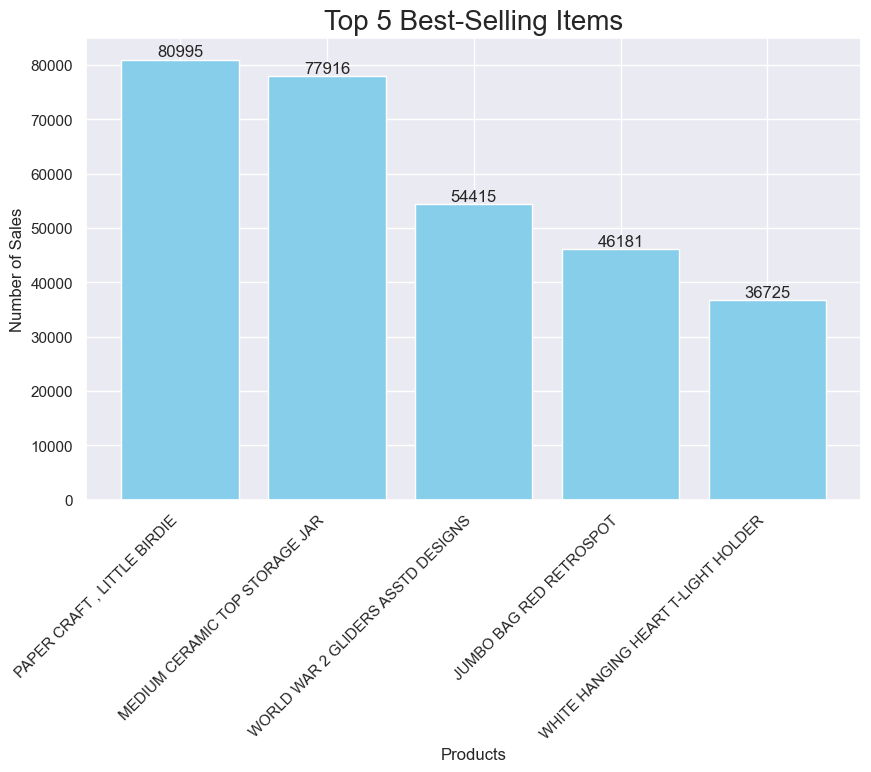

In [25]:
#Creating a plot to show the top 5 most selled produts
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_products.index, top_5_products.Quantity, color='skyblue')
for bar in bars:
    height = bar.get_height()  #Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height, 
        f'{int(height)}',  
        ha='center',  
        va='bottom'  
    )
plt.title('Top 5 Best-Selling Items',fontsize=20)
plt.xlabel('Products')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')


In [26]:
#Top 5 products by total revenue (TotalSpend).
top_revenue = df.groupby('Description')['TotalSpend'].sum().reset_index()
top_revenue_sorted = top_revenue.sort_values(by='TotalSpend',ascending=False)
top_5_revenue_products = top_revenue_sorted.head(5)
top_5_revenue_products

,Description,TotalSpend
2319,"PAPER CRAFT , LITTLE BIRDIE",168469.60
2767,REGENCY CAKESTAND 3 TIER,142592.95
3698,WHITE HANGING HEART T-LIGHT HOLDER,100448.15
1762,JUMBO BAG RED RETROSPOT,85220.78
1992,MEDIUM CERAMIC TOP STORAGE JAR,81416.73


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

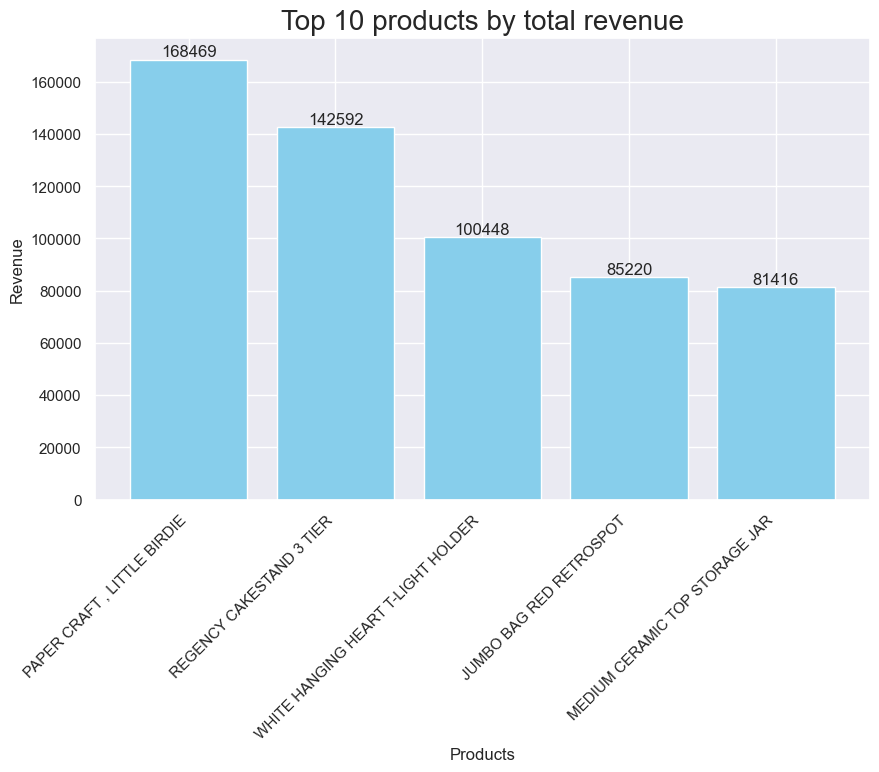

In [27]:
plt.figure(figsize=(10, 6))
bars_2 = plt.bar(top_5_revenue_products.Description, top_5_revenue_products.TotalSpend, color='skyblue')
for bar in bars_2:
    height = bar.get_height()  #Get the height of the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height, 
        f'{int(height)}',  
        ha='center',  
        va='bottom'  
    )
plt.title('Top 10 products by total revenue',fontsize=20)
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')

#### Client Analysis

In [28]:
#Finding the Countrys that spended more 
clients_country = df.groupby('Country')['TotalSpend'].sum().sort_values(ascending=False).round(2).reset_index()
clients_country

,Country,TotalSpend
0,United Kingdom,7308391.55
1,Netherlands,285446.34
2,EIRE,265545.90
3,Germany,228867.14
4,France,209024.05
5,Australia,138521.31
6,Spain,61577.11
7,Switzerland,56443.95
8,Belgium,41196.34
9,Sweden,38378.33


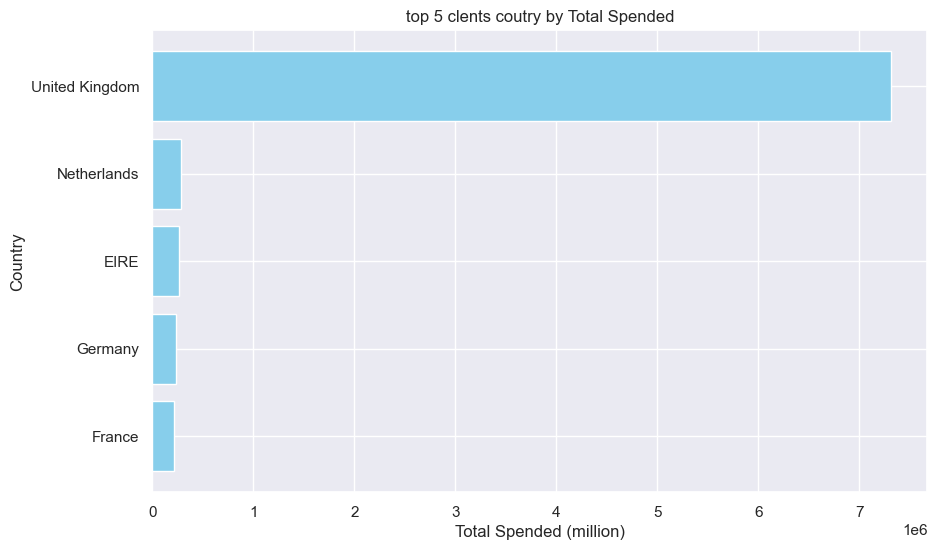

In [29]:
top_5_clients_country = clients_country.head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_5_clients_country['Country'], top_5_clients_country['TotalSpend'], color='skyblue')
plt.title('top 5 clents coutry by Total Spended')
plt.xlabel('Total Spended (million)')
plt.ylabel('Country')
plt.gca().invert_yaxis()